In [1]:

from diffractio import degrees, mm, plt, np, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.utils_drawing import draw_several_fields
from diffractio.utils_optics import beam_width_1D, FWHM1D, MTF_ideal, MTF_parameters
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_XY import Scalar_mask_XY
import math

number of processors: 8
total memory        : 8.0 Gb
available memory    : 5 %
max frequency       : 2400 GHz
cv2 not imported. Function send_image_screen cannot be used


In [2]:
#Sample Size

num_sample=  200000
lens_ratio= 1500

a4= 1.8429898 * 10** -15
a6= -3.8172252 * 10** -24
a8= -2.4345457 * 10**-32 
a10= 3.1730496 * 10**-41

lens_ratio = 1500

k = -0.6
R=12.78 
depth = 4
size= 12.5/2

a=[ a4 *lens_ratio**3, a6 *lens_ratio**3 ,a8*lens_ratio**3,a10*lens_ratio**3 ]

#Diameter

objective_diameter = 12 * mm
second_lens_diameter = 25.4 * mm

#Focal Length

focal_length_objective = 13.3*mm 
focal_length_second_lens = 200* mm
focal_length_aspheric = 10.913 * um

shift_in_focal_length = 0.040*mm

#Range

range_of_objective = np.linspace(-objective_diameter / 2 - 10 * um, objective_diameter / 2 + 10 * um, num_sample)
range_of_second_lens = np.linspace(-second_lens_diameter / 2 - 10 * um, second_lens_diameter / 2 + 10 * um, num_sample)

#Definition of Sources

wavelength = 0.532 * um

objective = Scalar_mask_X(x=range_of_second_lens, wavelength=wavelength)
second_lens = Scalar_mask_X(x=range_of_second_lens, wavelength=wavelength)

objective.lens(x0=0.0, focal=focal_length_objective, radius=objective_diameter/ 2)
second_lens.lens(x0=0.0, focal=focal_length_second_lens, radius=second_lens_diameter/ 2)




aspheric_lens = Scalar_mask_X(x=range_of_second_lens, wavelength=wavelength)
aspheric_lens.aspheric(x0 = 0, c= 1 / (R/lens_ratio*mm),a=a, k=-0.6,n0=1.517,n1= 1.517,radius= size/lens_ratio* mm)


#dx um
dx_second_lens= (second_lens_diameter + 20*um)/num_sample
dx_second_lens

/Users/nickolayerintitov/opt/anaconda3/lib/python3.9/site-packages/diffractio/scalar_masks_X.py:410: RuntimeWarning: invalid value encountered in sqrt
  t1 = c * s2 / (1 + np.sqrt(1 - (1 + k) * c**2 * s2))


0.1271

In [3]:
#Parameters


sigma_input_x = 1708*um
sigma_input_y = 1617*um

FWHM_x = 806*um #um
FWHM_y = 799*um #um

beam_diameter = FWHM_x*1.7 #um

#Definition of Source

initial_gauss_beam = Scalar_source_X(x=range_of_second_lens, wavelength=wavelength)
initial_gauss_beam.gauss_beam(A=1,x0=0,z0=0,w0=FWHM_x/np.sqrt(2*math.log(2)),theta=0 * degrees) 


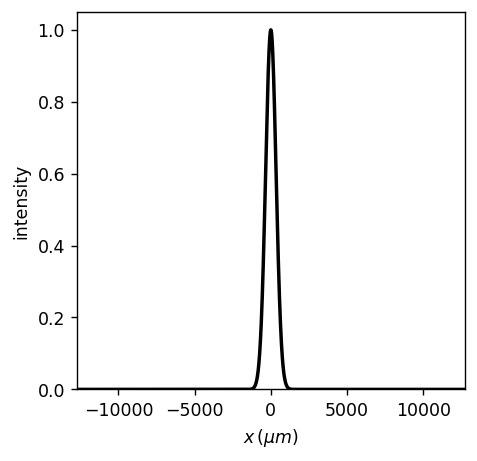

In [4]:
initial_gauss_beam.draw()

In [5]:
shift_in_focal_length = 0.020*mm

In [6]:
initial_gbeam_just_after_objective = initial_gauss_beam * objective
gbeam_at_focus_after_objective = initial_gbeam_just_after_objective.RS(z=focal_length_objective-shift_in_focal_length, verbose=True)

Good result: factor 6.05


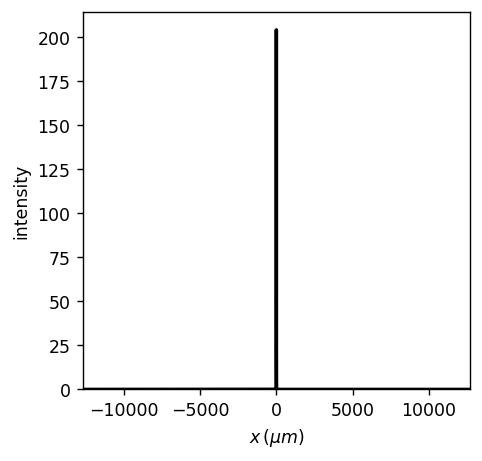

In [7]:
gbeam_at_focus_after_objective.draw()

(-10.0, 10.0)

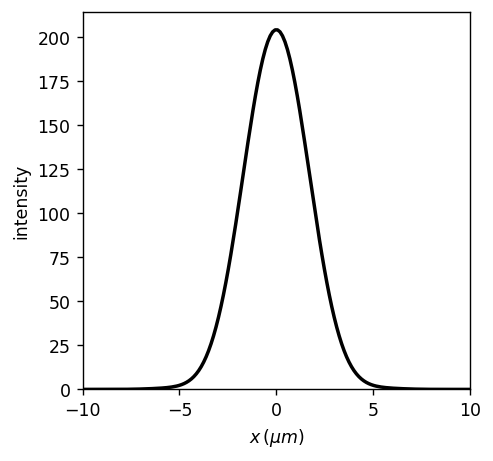

In [8]:
gbeam_at_focus_after_objective.draw()
plt.xlim(-10,10)
#plt.title("deneme")

In [9]:
focus_beam_2f = gbeam_at_focus_after_objective.RS(z=2*focal_length_aspheric )

Good result: factor 4.19


In [10]:
just_after_aspheric_lens = focus_beam_2f * aspheric_lens

In [11]:
aspheric_lens_2f = just_after_aspheric_lens.RS(z=  2* focal_length_aspheric )

Good result: factor 4.19


(-10.0, 10.0)

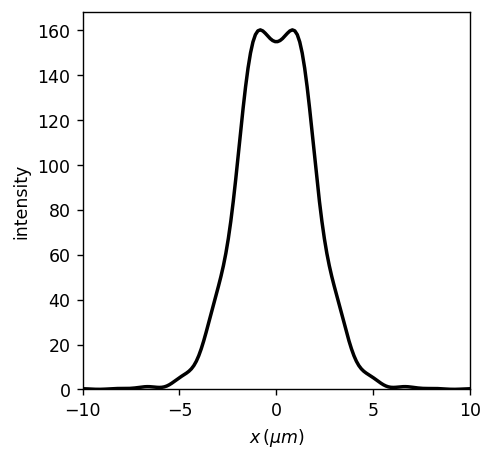

In [12]:
aspheric_lens_2f.draw()
plt.xlim(-10,10)

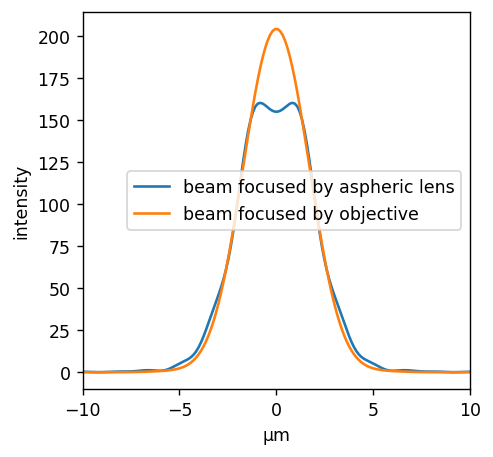

In [18]:
plt.plot(aspheric_lens_2f.x,np.abs(aspheric_lens_2f.u)**2,label="beam focused by aspheric lens")

plt.plot(gbeam_at_focus_after_objective.x,np.abs(gbeam_at_focus_after_objective.u)**2,label="beam focused by objective")
plt.xlabel("µm")
plt.ylabel("intensity")
plt.xlim(-10,10)
plt.legend()

In [19]:
aspheric_lens_objective_focus = aspheric_lens_2f.RS(z= focal_length_objective- shift_in_focal_length )

Good result: factor 6.05


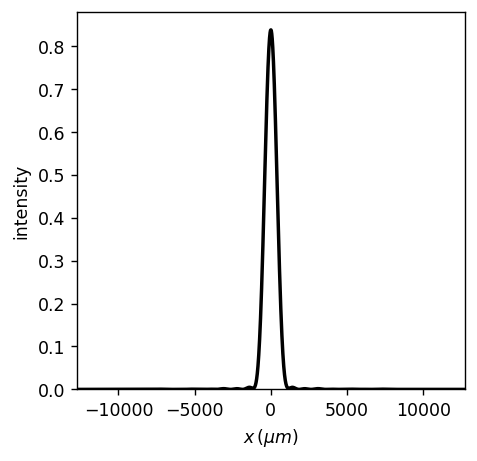

In [20]:
aspheric_lens_objective_focus.draw()

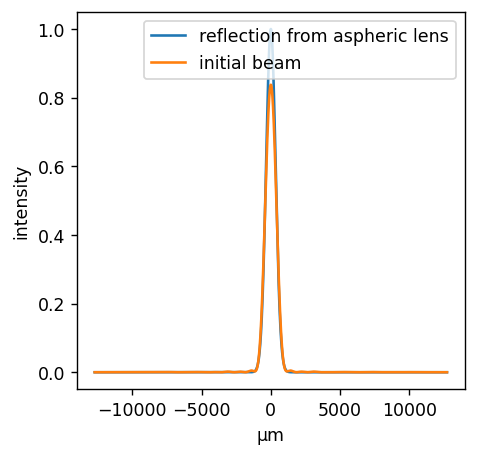

In [21]:
plt.plot(initial_gauss_beam.x,np.abs(initial_gauss_beam.u)**2,label="reflection from aspheric lens")

plt.plot(aspheric_lens_objective_focus.x,np.abs(aspheric_lens_objective_focus.u)**2,label="initial beam")
plt.xlabel("µm")
plt.ylabel("intensity")

plt.legend()

In [22]:
objective_twice = aspheric_lens_objective_focus * objective

In [23]:
just_after_second_lens = objective_twice * second_lens

In [24]:
second_lens_focus = just_after_second_lens.RS(z= focal_length_second_lens)

Good result: factor 65.98


(-100.0, 100.0)

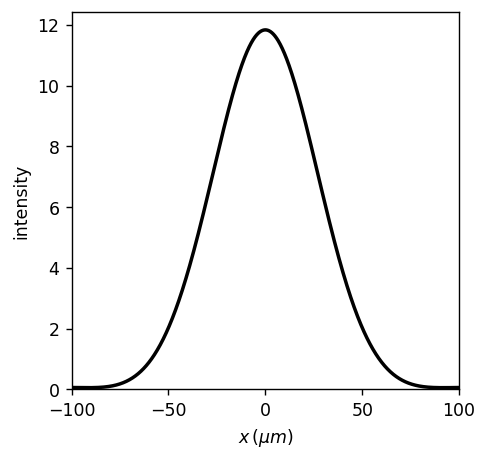

In [25]:
second_lens_focus.draw()
plt.xlim(-100,100)

63.037510251800995

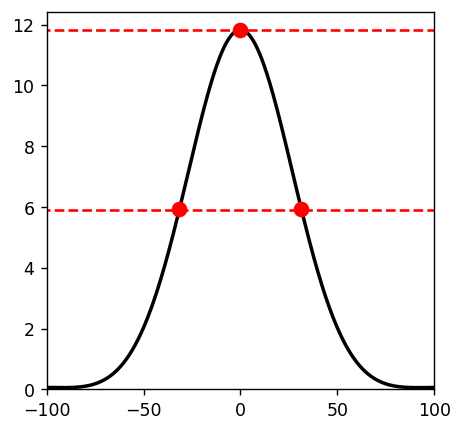

In [26]:
fwhm_final = FWHM1D(second_lens_focus.x,np.abs(second_lens_focus.u)**2,has_draw=True)
plt.xlim(-100,100)
fwhm_final

### Finding Focus of Aspheric lens

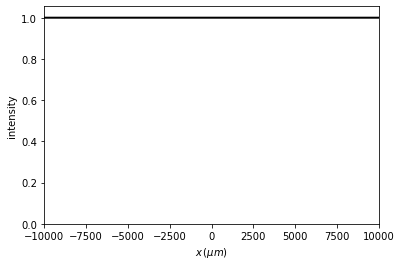

In [81]:
x0 = np.linspace(-10 * mm, 10 * mm, 200000)
wavelength = 0.532 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave()
u0.draw()

In [23]:
just_after_aspheric_lens_X = u0* aspheric_lens

In [83]:
fwhm_array = []
for i in np.arange(0.01,1,0.01):
    

   
    u2 = just_after_aspheric_lens_X.RS(z=10.5 * um +i * um, verbose=False)
    
    
    fwhm = FWHM1D(u2.x, np.abs(u2.u)**2, has_draw=False)
   
    
    
    fwhm_array.append(fwhm)
   

In [84]:
fwhm_array

[2.5196777227702114,
 2.5249821838151547,
 2.5302301671981695,
 4.675416041420249,
 4.675438877624401,
 4.675481688096625,
 4.675543996410852,
 4.675625339106773,
 4.675725265275105,
 4.675843336135586,
 4.675979124633159,
 4.676132215034158,
 4.6763022025625105,
 4.676488693039573,
 4.676691302516701,
 4.676909656940552,
 4.677143391832942,
 4.677392151963431,
 4.677655591043731,
 4.67793337142939,
 4.678225163843308,
 4.678530647081061,
 4.678849507752602,
 4.679181440016691,
 4.6795261453298735,
 4.679883332199097,
 4.68025271595252,
 4.680634018499404,
 4.681026968115475,
 4.6814312992173654,
 2.101628346998041,
 2.1005328576466127,
 2.0994582323564828,
 2.098404170919821,
 2.0973703801064403,
 2.0963565734600706,
 2.0953624711055454,
 2.0943877995596267,
 2.0934322915400116,
 2.5937830881375703,
 2.0915777269547107,
 2.090678165288409,
 2.0897967566234,
 2.0889332621500216,
 2.0880874482591025,
 4.689252559499437,
 4.689814768620636,
 4.690384417066525,
 4.6909613221323525,
 4.691

In [26]:
fwhm_array_fixed = fwhm_array

fwhm_array_fixed.remove(1380924072.3833518)
fwhm_array_fixed.remove( 639268113.1164213)
fwhm_array_fixed.remove(2109822566.2347066)    
fwhm_array_fixed.remove(2830396570.0227437)
fwhm_array_fixed.remove(3537869388.608673)
fwhm_array_fixed.remove(4236771499.2302384)



Text(0, 0.5, 'fwhm')

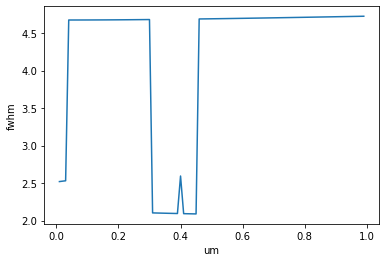

In [85]:
plt.plot(np.arange(0.01,1,0.01),fwhm_array)
plt.xlabel("um")
plt.ylabel("fwhm")



In [32]:
9.923 * um +99*0.01 * um

10.913

5.239351956488463

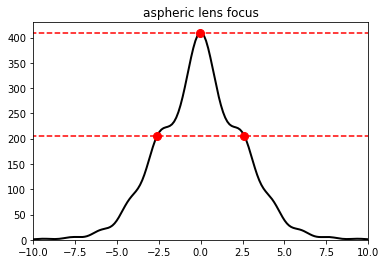

In [29]:
fwhm = FWHM1D(just_after_aspheric_lens_RS.x, np.abs(just_after_aspheric_lens_RS.u)**2, has_draw=True)
plt.xlim(-10,10)
plt.title("aspheric lens focus")
fwhm

2.6937784614856355

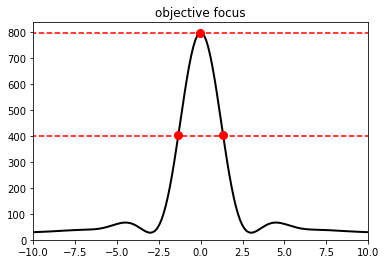

In [30]:
fwhm_incident = FWHM1D(gbeam_at_focus_after_objective.x, np.abs(gbeam_at_focus_after_objective.u)**2, has_draw=True)
plt.xlim(-10,10)
plt.title("objective focus")
fwhm_incident

In [31]:
fwhm_array_fixed[85]

2.098091918422142